Dalam pemrosesan data berbentuk teks, dapat menggunakan fitur text similiarity (ukuran kemiripan teks) untuk mendukung model yang digunakan. Beberapa contoh aplikasi text similiarity yang dapat digunakan adalah :
* Search engine (mesin pencari)
* Chatbot
* Short Answer Scoring
* Plagiarism Detection

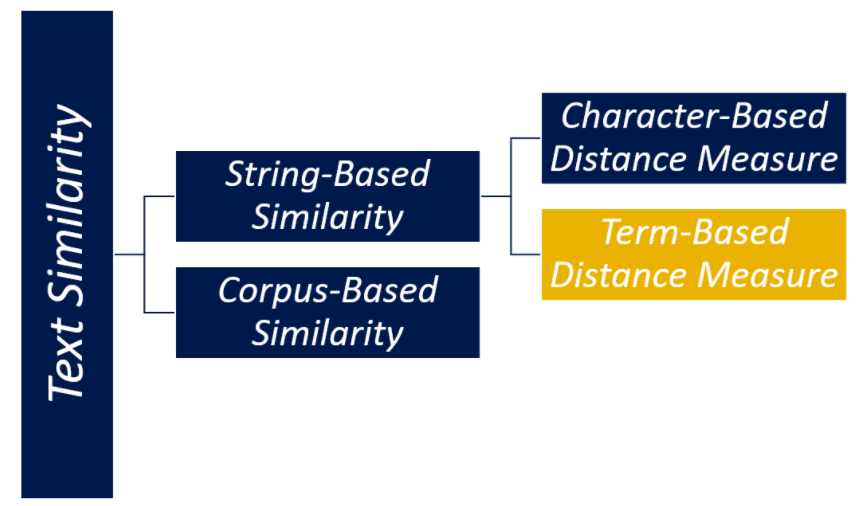

Ukuran kemiripan teks adalah suatu ukuran yang menggambarkan tingkat kemiripan antara satu teks dengan teks lainnya. Teks dapat terdiri dari beberapa kata, namun dapat bula terdiri dari milyaran kata yang tertulis dalam sebuah naskah. Secara umum, terdapat dua kategori untuk mengukur hal tersebut.
* String Based Similiarity
* Corpus Based Similiarity

---
# Jaccard Index

Jaccard index, dikenal juga dengan Jaccard similarity coefficient, melihat objek data sebagai himpunan. Selanjutnya, didefinisikan ukuran dari irisan dua himpunan dibagi dengan ukuran dari gabungan dua himpunan.

Contoh

Kalimat 1 : The bottle is empty.

Kalimat 2 : There is nothing in the bottle.

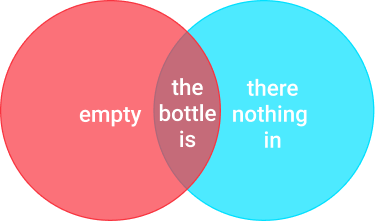

Ukuran dari irisan dua himpunan: 3

Ukuran dari gabungan dua himpunan: 1+3+3 = 7

Dengan Jaccard Index, diperoleh tingkat kemiripannya adalah 3/7 = 0.42



In [1]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [4]:
sentences = ["The bottle is empty", "There is nothing in the bottle"]
sentences = [sent.lower().split(" ") for sent in sentences]
jaccard_similarity(sentences[0], sentences[1])

0.42857142857142855

---
# Cosine Similiarity
Ukuran ini menghitung nilai cosinus sudut antar dua vektor. vektor yang digunakan dalam perhitungan ini adalah vektor yang merepresentasikan teks yang ada. Persamaan sebagai berikut

\begin{equation}
\cos \theta=\frac{\mathbf{a} . \mathbf{b}}{\|\mathbf{a}\|\|\mathbf{b}\|}
\end{equation}

dengan a adalah vektor teks pertama dan b adalah vektor teks kedua

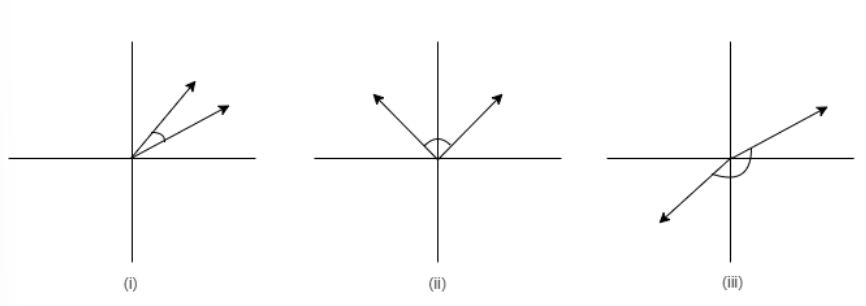

Rentang nilai cosine similiarity adalah dari -1 hingga 1. terdapat tiga kemungkinan kategori yang ada dalam ukuran ini

* kedua teks mirip, ketika sudut antara vektornya mendekati nol dan nilai cosinusnya mendekati 1.
* kedua teks tidak berkaitan atau tidak mirip, ketika sudut antar vektornya mendekati 90 derajat dan nilai cosinusnya mendekati nol.
* Kedua teks berlawanan, ketika sudut antar vektornya mendekati 180 derajat dan nilai cosinusnya mendekati -1.

Karena perhitungan cosine similiarity membutuhkan tipe data berbentuk vektor, maka perlu dilakukan transformasi data teks dengan vektor (vektorisasi teks). Vektorisasi teks adalah teknik untuk mengubah teks menjadi bentuk yang mudah dipahami oleh mesin yaitu vektor, susunan dari angka-angka bilangan bulat. Setiap kalimat yang ada direpresentasikan dalam bentuk vektor. Untuk vektorisasi teks dapat dilakukan dengan beberapa cara, salah satunya dengan melakukan pembentukan Bag of Word.

BoW merupakan salah satu teknik vektorisasi teks yang membangun vektor berdasarkan banyaknya kata unik yang terdapat dalam kalimat. Secara fundamental, BoW lebih berperna dalam mengekstrak informasi berdasarkan banyaknya kemunculan kata daripada di mana kata itu muncul dalam suatu teks. Alur pembentukan vektornya adalah:
* Menyusun setiap kata yang unik ke angka dan didaftarkan.
* Dalam setiap kalimat kemudian dihitung banyaknya setiap kata unik yang ada.
* Terbentuklah vektor BoW dari masing-masing teks.

Contoh

Kalimat 1 : Classification produce discrete value.

Kalimat 2 : Discrete value on classification.

Maka Bag of Word nya berupa:
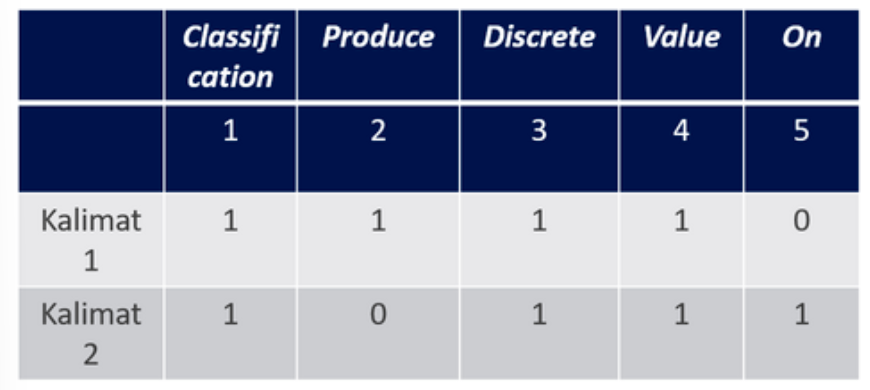

Vektor kalimat 1 adalah a = [1, 1, 1, 1, 0]
vektor kalimat 2 adalah b = [1, 0, 1, 1, 1]

Setelah data bertipe vektor, maka kemudian dapat dihitung cosine similiarity-nya:

\begin{equation}
\cos \theta=\frac{\mathbf{a} . \mathbf{b}}{\|\mathbf{a}\|\|\mathbf{b}\|}=\frac{1 \times 1+1 \times 0+1 \times 1+1 \times 1+0 \times 1}{\sqrt{4} \sqrt{4}}=0.75
\end{equation}

Jadi, berdasarkan perhitungan cosine similiarity, tingkat kemiripan antar dua kalimat tersebut adalah 0.75

# CATATAN
Ketika melakukan vektorisasi teks dengan menggunakan Bag Of Word (BoW), maka nilai cosine similarity akan selalu bernilai non-negatif karena elemen-elemen dalam vektor adalah banyaknya suatu kata bernilai non-negatif. Akibatnya, Cosine Similarity dengan BoW terbatas untuk mendeteksi kemiripan suatu teks dari segi permukaan atau leksikal saja. Ia belum bisa mendeteksi apakah 2 kalimat itu memiliki informasi yang berlawanan.

In [7]:
#Import package yang digunakan
import math as m
import pandas as pd

def cosine_sim(vec1, vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate (vec1):
        dot_prod += v * vec2[i]
    mag_1 = m.sqrt(sum([x**2 for x in vec1])) #m.log, m.exp
    mag_2 = m.sqrt(sum([x**2 for x in vec2]))
    return dot_prod / (mag_1 * mag_2)

kalimat1 = 'classification produce discrete value' #kalimat1 = pd.read_excel()
kalimat2 = 'discrete value on classification' 

#Pembentukan vektor Bag of Word
cosineBow = [] 
bagofwordsA= kalimat1.split(' ')
bagofwordsB= kalimat2.split(' ')
uniquewords = set(bagofwordsA).union(set(bagofwordsB))
numofwordsA = dict.fromkeys(uniquewords, 0)
for word in bagofwordsA :
    numofwordsA[word] += 1
    numofwordsB = dict.fromkeys(uniquewords, 0)
for word in bagofwordsB :
    numofwordsB[word] += 1
    
cosine_sim(numofwordsA.values(), numofwordsB.values())

0.75

---
# Euclidean Distance

Euclidean distance mengidentifikasi seberapa jauh dua vektor terpisah satu sama lain. Artinya dia melihat jarak kedekatan antara dua teks. Jika cosine similarity memperhatikan sudut antar vektor, euclidean distance lebih memperhatikan jarak antar vektor dalam euclidean space. Persamaan matematika dalam menghitung jaraknya adalah :
\\begin{equation}
d(\vec{v}, \vec{w})=\sqrt{\sum_{i=1}^{n}\left(v_{i}-w_{i}\right)^{2}}
\end{equation}

di mana \\begin{equation}(\vec{v})\end{equation} adalah vektor teks 1, \\begin{equation}(\vec{w})\end{equation}\
adalah vektor teks 2, n adalah dimensi dari vektor tersebut.


---

Misal kita menggunakan contoh sebelumnya di mana

Kalimat 1 : Classification produce discrete value

Kalimat 2 : Discrete value on classification

Kemudian kita dapatkan vektor teks dari masing-masing kalimat yaitu :
A= [1,1,1,1,0]
dan
B= [1,0,1,1,1]

maka 
\\begin{equation}d(\vec{v}, \vec{w})=\sqrt{\sum_{i=1}^{n}\left(v_{i}-w_{i}\right)^{2}} = \sqrt{(1-1)^{2}+(1-0)^{2}+(1-1)^{2}+(1-1)^{2} + (0-1)^{2}} = \sqrt{2} = 1.414 \end{equation} 

didapat jarak antara 2 kalimat adalah 1.414, artinya antar 2 vektor tersebut memiliki jarak yang cukup dekat.

In [8]:
import numpy as np

#Pembentukan vektor Bag of Word
cosineBow = [] 
bagofwordsA= kalimat1.split(' ')
bagofwordsB= kalimat2.split(' ')
uniquewords = set(bagofwordsA).union(set(bagofwordsB))
numofwordsA = dict.fromkeys(uniquewords, 0)
for word in bagofwordsA :
    numofwordsA[word] += 1
    numofwordsB = dict.fromkeys(uniquewords, 0)
for word in bagofwordsB :
    numofwordsB[word] += 1

#definisi array dari masing-masing kalimat
kalimat1array= np.array(list(numofwordsA.values()))
kalimat2array= np.array(list(numofwordsB.values()))

#euclidean distance
d = np.linalg.norm(kalimat1array - kalimat2array)
d

1.4142135623730951

# Overlap Coefficient
Overlap coefficient, disebut juga dengan Szymkiewicz-Simpson Coefficient adalah ukuran yang menghitung overlap dari dua himpunan. Ukurannya dihitung dengan melakukan pembagian panjang irisan dari dua himpunan dengan panjang himpunan yang paling kecil. Jika himpunan pertama adalah subset atau subhimpunan dari himpunan kedua, vice versa, maka nilai overlap coefficientnya akan menjadi 1. Jika tidak ada kata yang sama antara teks pertama dan kedua, maka nilai overlap coefficientnya akan bernilai nol.

\\begin{equation}
\operatorname{Overlap}\left(D_{1}, D_{2}\right)=\frac{\left|D_{1} \cap D_{2}\right|}{\min \left(\left|D_{1}\right|,\left|D_{2}\right|\right)}
\end{equation}

dengan \\begin{equation}(D_1)\end{equation} adalah vektor teks 1 dan \\begin{equation}(D_2)\end{equation} adalah vektor teks 2.



In [11]:
#Definisikan kalimat yang akan dihitung overlappingnya
A={'Budi','Mau','Makan'}
B={'Siti','Mau','Tidur','Siang'}

#Definisikan fungsi Overlap
def overlap(A,B):
    up=len(A.intersection(B))
    do=min(len(A),len(B))
    return up/do

overlap(A,B)   

0.3333333333333333

In [ ]:
Data1 = pd.read_excel('blabla.xlsx', coloumns = A, row = 100 )
Data2 =  pd.read_excel('blabla.xlsx', coloumns = B , row = 10)